### 1)

chisq is  15267.937435709791  for  2501  degrees of freedom.


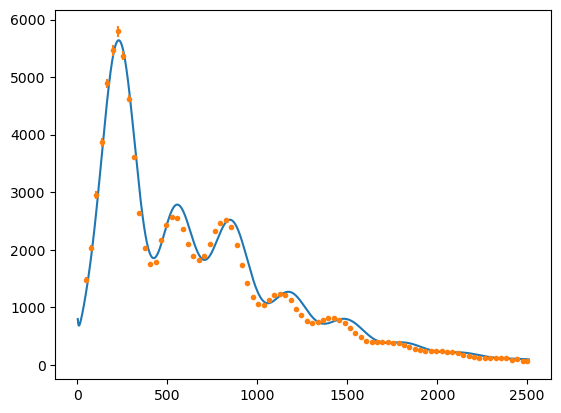

In [88]:
# Sample script

import numpy as np
import camb
from matplotlib import pyplot as plt
import time


def get_spectrum(pars,lmax=3000,fix_tau=False):
    #print('pars are ',pars)
    H0=pars[0]
    ombh2=pars[1]
    omch2=pars[2]
    if fix_tau:
        tau=0.0540
        As=pars[3]
        ns=pars[4]
    else:
        tau=pars[3]
        As=pars[4]
        ns=pars[5]
    pars=camb.CAMBparams()
    pars.set_cosmology(H0=H0,ombh2=ombh2,omch2=omch2,mnu=0.06,omk=0,tau=tau)
    pars.InitPower.set_params(As=As,ns=ns,r=0)
    pars.set_for_lmax(lmax,lens_potential_accuracy=0)
    results=camb.get_results(pars)
    powers=results.get_cmb_power_spectra(pars,CMB_unit='muK')
    cmb=powers['total']
    tt=cmb[:,0]    #you could return the full power spectrum here if you wanted to do say EE
    return tt[2:]


plt.ion()

pars=np.asarray([60,0.02,0.1,0.05,2.00e-9,1.0])
planck=np.loadtxt('COM_PowerSpect_CMB-TT-full_R3.01.txt',skiprows=1)
ell=planck[:,0]
spec=planck[:,1]
errs=0.5*(planck[:,2]+planck[:,3])
model=get_spectrum(pars)
model=model[:len(spec)]
resid=spec-model
chisq=np.sum( (resid/errs)**2)
print("chisq is ",chisq," for ",len(resid)-len(pars)," degrees of freedom.")
#read in a binned version of the Planck PS for plotting purposes
planck_binned=np.loadtxt('COM_PowerSpect_CMB-TT-binned_R3.01.txt',skiprows=1)
errs_binned=0.5*(planck_binned[:,2]+planck_binned[:,3]);
plt.clf()
plt.plot(ell,model)
plt.errorbar(planck_binned[:,0],planck_binned[:,1],errs_binned,fmt='.')
plt.show()

chisq is  3272.203673904469  for  2501  degrees of freedom.


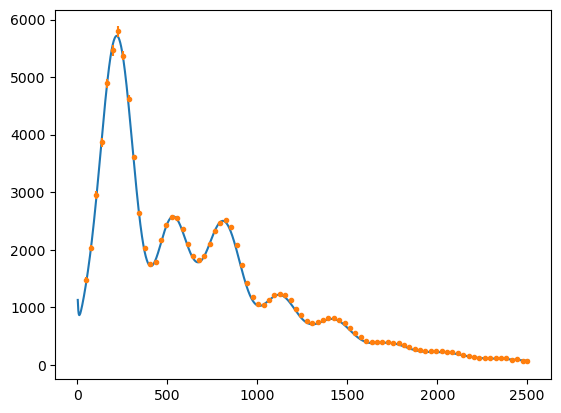

In [89]:
pars=np.asarray([69,0.022,0.12,0.06,2.1e-9,0.95])
model=get_spectrum(pars)
model=model[:len(spec)]
resid=spec-model
chisq=np.sum( (resid/errs)**2)
print("chisq is ",chisq," for ",len(resid)-len(pars)," degrees of freedom.")
#read in a binned version of the Planck PS for plotting purposes
errs_binned=0.5*(planck_binned[:,2]+planck_binned[:,3]);
plt.clf()
plt.plot(ell,model)
plt.errorbar(planck_binned[:,0],planck_binned[:,1],errs_binned,fmt='.')
plt.show()

In [9]:
print(3272.2/len(planck))

1.3052253689668927


For the initial parameters got a chi-squared of 15267.9 which is not a good fit as it is much higher than the degrees of freedom. Using the values given in the problem we obtain a chi-squared value of 3272.2 which is better only 1.3 times the degrees of freedom.

### 2)

In [90]:
def calc_num_der(fun,p,lendata,fixed=False):
    grad=np.zeros([lendata,len(p)], dtype=np.float64)
    y=fun(p,fix_tau=fixed)[:len(spec)]
    for i in range(len(p)):
        dx = 0.01*p[i]
        dx_array = np.zeros(np.shape(p), dtype=np.float64)
        dx_array[i] = dx
        grad[:,i]=(fun(p+dx_array,fix_tau=fixed)[:len(spec)] - fun(p-dx_array,fix_tau=fixed)[:len(spec)])/(2*dx)
    return y,grad

for j in range(6):
    pred1,grad1=calc_num_der(get_spectrum,pars,len(spec))
    chi2=sum(np.array(((pred1-spec)/errs))**2)
    r1=spec-pred1
    r1=np.matrix(r1).T
    grad1=np.matrix(grad1)
    lhs1=grad1.T@grad1
    rhs1=grad1.T@r1
    dp1=np.linalg.pinv(lhs1)@(rhs1)
    for jj in range(len(pars)):
        pars[jj]=pars[jj]+dp1[jj]
    print(pars,chi2)

[6.90000000e+01 2.20000000e-02 1.20000000e-01 6.00000000e-02
 2.11779228e-09 9.50000000e-01] 3272.203673904469
[6.90000000e+01 2.20000000e-02 1.20000000e-01 6.00000000e-02
 2.11779232e-09 9.50000000e-01] 3059.3763413101424
[6.90000000e+01 2.20000000e-02 1.20000000e-01 6.00000000e-02
 2.11779232e-09 9.50000000e-01] 3059.3760330128175
[6.90000000e+01 2.20000000e-02 1.20000000e-01 6.00000000e-02
 2.11779232e-09 9.50000000e-01] 3059.3760330159143
[6.90000000e+01 2.20000000e-02 1.20000000e-01 6.00000000e-02
 2.11779232e-09 9.50000000e-01] 3059.3760330159057
[6.90000000e+01 2.20000000e-02 1.20000000e-01 6.00000000e-02
 2.11779232e-09 9.50000000e-01] 3059.3760330159057


In [17]:
print(pars)
N = np.mean((spec-pred1)**2)
print(N)
par_errs=np.sqrt(N*np.diag(np.linalg.inv(lhs1)))
print(par_errs)

f = open("planck_fit_params.txt", "x")
f.write('Best-fit parameters: {}\n'.format(np.array2string(pars)))
f.write('Errors in parameters: {}'.format(np.array2string(par_errs)))
f.close()

[6.90000000e+01 2.20000000e-02 1.20000000e-01 6.00000000e-02
 2.11779232e-09 9.50000000e-01]
32885.267283882284
[1.73048608e+00 3.58805686e-04 3.63701363e-03 4.57945090e-02
 1.83574203e-10 1.10856860e-02]


### 3)

In [36]:
from datetime import datetime
import sys
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
from IPython.utils import io

def get_chi2(pars,y,errs):
    with io.capture_output() as captured:
        pred=get_spectrum(pars)[:len(y)]
    return sum(np.array(((pred-y)/errs))**2)

mcpars=pars
steps=10000
chains=np.zeros([steps,len(mcpars)+1])
accepted=0
mcpars=mcpars+np.random.randn(len(mcpars))*par_errs
chi2=get_chi2(mcpars,spec,errs)
chains[0,:]=np.append(chi2,mcpars)
print(datetime.now().strftime("\n%H:%M:%S.%f"))
try:
    for i in range(1,steps):
        pars_new=mcpars+0.05*np.random.randn(len(mcpars))*par_errs
        chi2_new=get_chi2(pars_new,spec,errs)
        prob=np.exp(-0.5*(chi2_new-chi2))
        accept=prob>np.random.rand(1)
        if accept:
            accepted+=1
            mcpars=pars_new
            chi2=chi2_new
        chains[i,:]=np.append(chi2,mcpars)
        if i%50==0:
            print('Progress: {}% | Accepted: {}% | Chi2: {}'.format(np.round((i/steps)*100,1),
                   np.round((accepted/i)*100,1),np.round(chi2,1)), end="\r", flush=True)
        i+=1
except KeyboardInterrupt:
    pass
np.savetxt("planck_chain.txt",chains,delimiter=',')
print(datetime.now().strftime("\n%H:%M:%S.%f"))


02:08:10.081581
Progress: 99.5% | Accepted: 23.0% | Chi2: 2584.0
03:43:18.957924


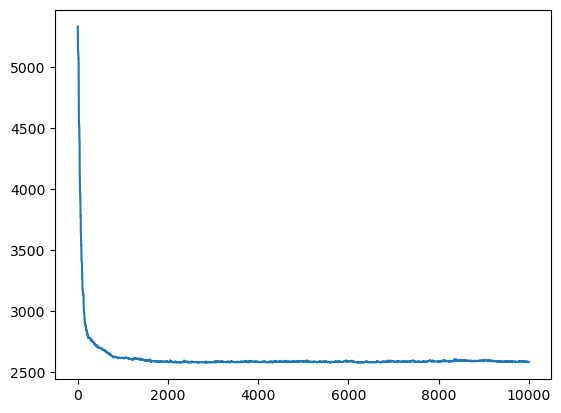

In [38]:
plt.plot(range(steps),chains[:,0])

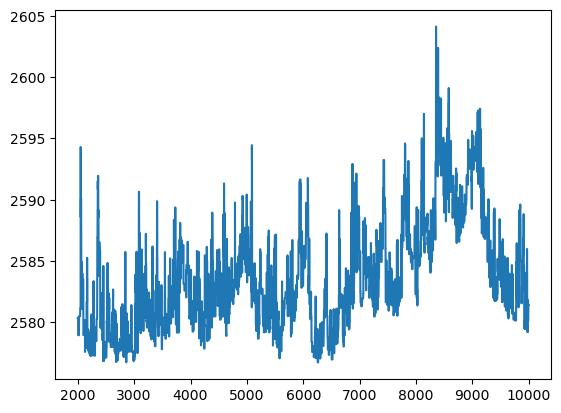

In [39]:
plt.plot(range(steps)[2000:],chains[2000:,0])

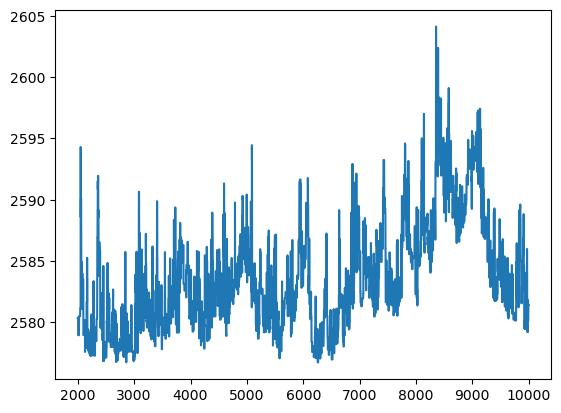

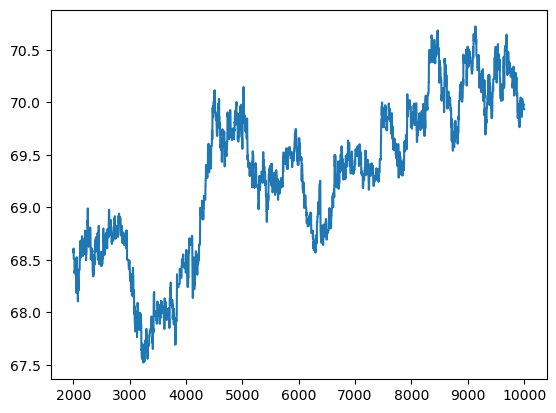

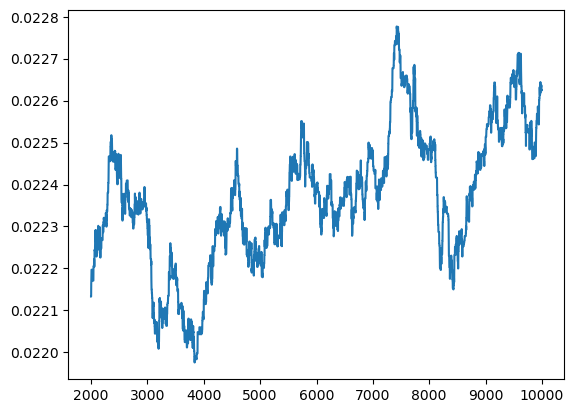

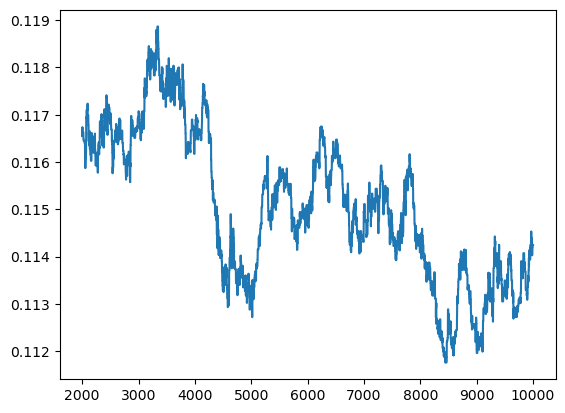

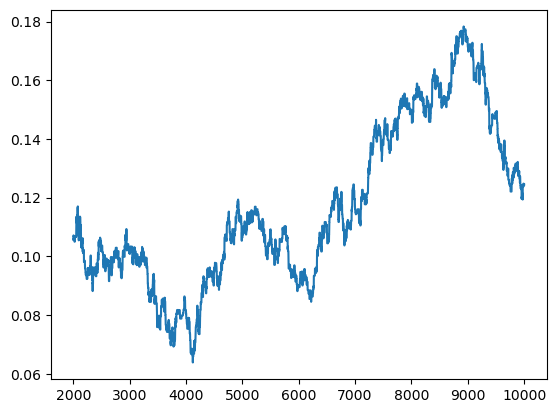

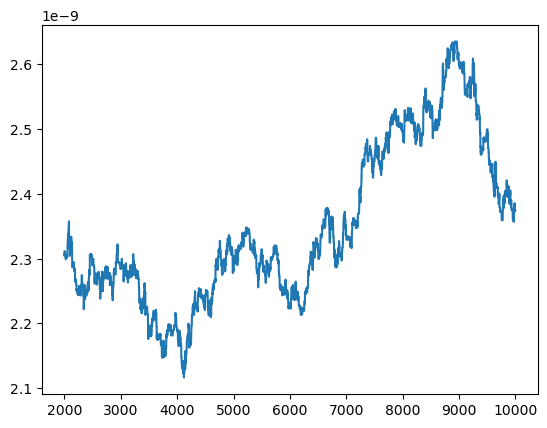

In [49]:
for i in range(6):
    plt.plot(range(steps)[2000:],chains[2000:,i])
    plt.show()

In [58]:
final_pars = []
for i in range(1,np.shape(chains)[1]):
    val=np.mean(chains[:,i])
    scat=np.std(chains[:,i])
    final_pars.append([val,scat])
    print([val,scat])

[68.9698835114894, 1.0292952982205967]
[0.022132277253063482, 0.000575507025484718]
[0.11504521137584829, 0.0016655387029129887]
[0.11365470455314812, 0.026171587103233886]
[2.332186713082096e-09, 1.217928601906132e-10]
[0.9805359165875569, 0.006424800827851004]


In [68]:
h = final_pars[0][0]/100
h_err = final_pars[0][1]/100
h2_err = 2*(h_err/h)
temp1 = (final_pars[1][1]/final_pars[1][0]+h2_err)*(final_pars[1][0]/h**2)
temp2 = (final_pars[2][1]/final_pars[2][0]+h2_err)*(final_pars[2][0]/h**2)
print(1-final_pars[1][0]/h**2-final_pars[2][0]/h**2,temp1+temp2)

0.7116208464106972 0.013318649038606564


Does not seem like the chains are converged as they still have pattern to them and do not appear like noise. Calculated value for dark energy of 0.71 $\pm$ 0.01.

### 4)

In [92]:
pars=np.asarray([69,0.022,0.12,0.06,2.1e-9,0.95])
fix_pars=np.asarray([pars[0],pars[1],pars[2],pars[4],pars[5]])

for j in range(6):
    pred1,grad1=calc_num_der(get_spectrum,fix_pars,len(spec), True)
    chi2=sum(np.array(((pred1-spec)/errs))**2)
    r1=spec-pred1
    r1=np.matrix(r1).T
    grad1=np.matrix(grad1)
    lhs1=grad1.T@grad1
    rhs1=grad1.T@r1
    dp1=np.linalg.pinv(lhs1)@(rhs1)
    for jj in range(len(fix_pars)):
        fix_pars[jj]=fix_pars[jj]+dp1[jj]
    print(fix_pars,chi2)

[6.90000000e+01 2.20000000e-02 1.20000000e-01 2.09265201e-09
 9.50000000e-01] 2992.352698026743
[6.9000000e+01 2.2000000e-02 1.2000000e-01 2.0926521e-09 9.5000000e-01] 3059.332996493575
[6.9000000e+01 2.2000000e-02 1.2000000e-01 2.0926521e-09 9.5000000e-01] 3059.3320185444713
[6.9000000e+01 2.2000000e-02 1.2000000e-01 2.0926521e-09 9.5000000e-01] 3059.3320185527587
[6.9000000e+01 2.2000000e-02 1.2000000e-01 2.0926521e-09 9.5000000e-01] 3059.3320185527587
[6.9000000e+01 2.2000000e-02 1.2000000e-01 2.0926521e-09 9.5000000e-01] 3059.3320185527587


In [93]:
N = np.mean((spec-pred1)**2)
print(N)
par_errs=np.sqrt(N*np.diag(np.linalg.inv(lhs1)))
print(par_errs)

32859.862070636555
[1.31637550e+00 2.86353704e-04 2.87430374e-03 1.67976238e-11
 7.54696105e-03]


In [99]:
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

def get_chi2(pars,y,errs):
    with io.capture_output() as captured:
        pred=get_spectrum(pars,fix_tau=True)[:len(y)]
    return sum(np.array(((pred-y)/errs))**2)

# mcpars=fix_pars
mcpars=save_chains[-1,:]
steps=10000
chains=np.zeros([steps,len(mcpars)+1])
accepted=0
mcpars=mcpars+np.random.randn(len(mcpars))*par_errs
chi2=get_chi2(mcpars,spec,errs)
chains[0,:]=np.append(chi2,mcpars)
print(datetime.now().strftime("\n%H:%M:%S.%f"))
try:
    for i in range(1,steps):
        pars_new=mcpars+0.10*np.random.randn(len(mcpars))*par_errs
        chi2_new=get_chi2(pars_new,spec,errs)
        prob=np.exp(-0.5*(chi2_new-chi2))
        accept=prob>np.random.rand(1)
        if accept:
            accepted+=1
            mcpars=pars_new
            chi2=chi2_new
        chains[i,:]=np.append(chi2,mcpars)
        if i%50==0:
            print('Progress: {}% | Accepted: {}% | Chi2: {}'.format(np.round((i/steps)*100,1),
                   np.round((accepted/i)*100,1),np.round(chi2,1)), end="\r", flush=True)
        i+=1
except KeyboardInterrupt:
    pass
np.savetxt("planck_chain_tauprior1.txt",chains,delimiter=',')
print(datetime.now().strftime("\n%H:%M:%S.%f"))


05:16:25.946081
Progress: 99.5% | Accepted: 26.6% | Chi2: 2581.1
06:58:47.220892


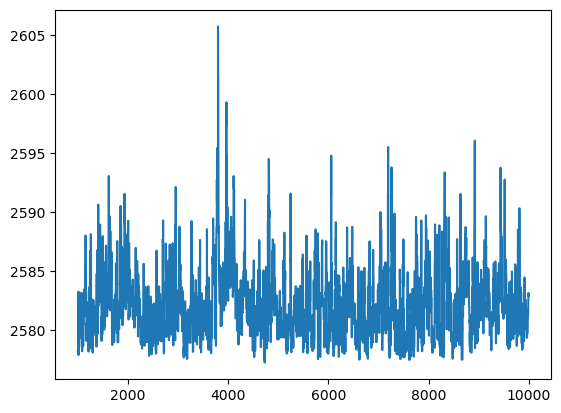

In [102]:
plt.plot(range(steps)[1000:],chains[1000:,0])

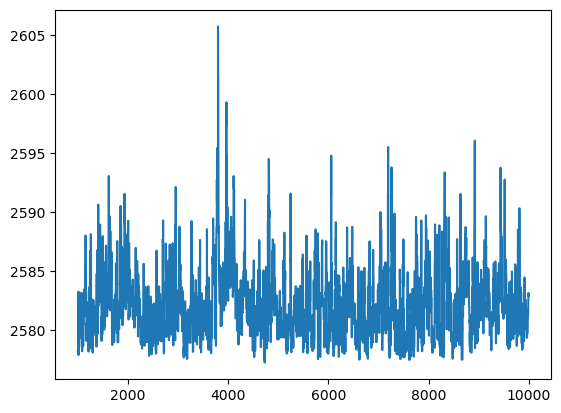

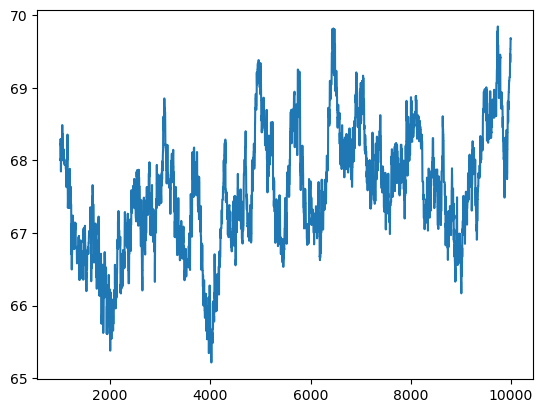

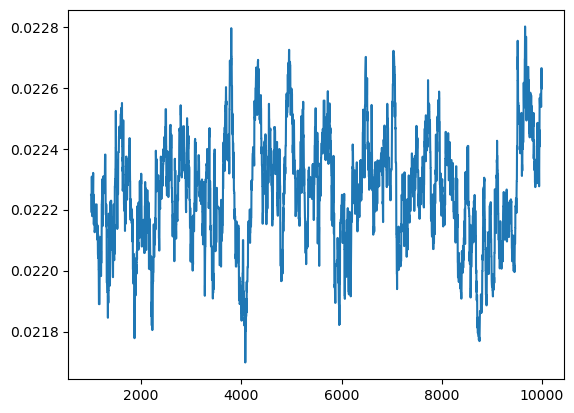

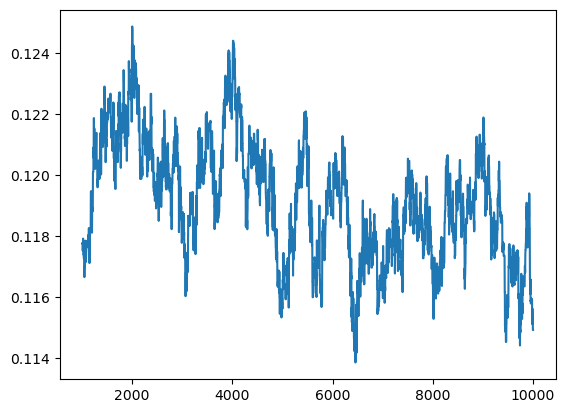

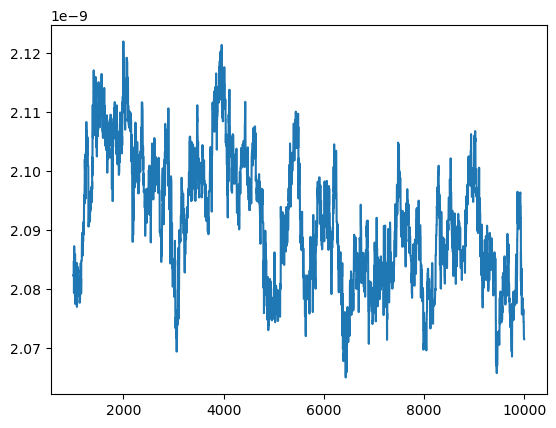

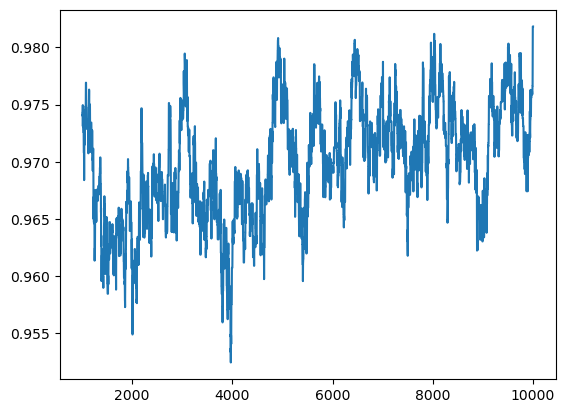

In [104]:
for i in range(6):
    plt.plot(range(steps)[1000:],chains[1000:,i])
    plt.show()

In [106]:
save_chains=chains

Even with fixed tau does not seem to be converging.